In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

<h1><center>Linear Regression</center></h1>

<b>Linear Regression</b> is a useful tool for predicting a quantitative response.

### 3.1 Simple Linear Regression

<b>Simple linear regression</b> is a straightforward approach for predicting a <b>quantitative response</b> on the basis of a single predictor variable. Mathematically it can be written as:

$$Y \approx \beta_0 + \beta_1 X$$

$\beta_0$ and $\beta_1$ represent intercept and slope and are called as <b>model coefficients or parameters.</b> The estimated equation is given as:

$$\widehat{y} \approx \widehat{\beta_0} + \widehat{\beta_1} x$$

where hat symbol is used to denote the estimated values.

#### 3.1.1 Estimating the Coefficients 

The goal of linear regression is to find the estimate and slope such that the line is as close as possible to the data points. There are a number of ways of measuring <b>closeness</b>. The most common approach involves minimizing the <b>least square</b> criterion.

Let $\widehat{y_i} \approx \widehat{\beta_0} + \widehat{\beta_1} x_i$ be the prediction for $i$th value of X, then $e_i = y_i - \widehat{y_i}$ represents the <b>$i$th residual</b>. We define the <b>residual sum of squares(RSS)</b> as:

$$RSS = e_1^2 + e_2^2 + ... + e_n^2$$

The least square method chooses the coefficient to minimize RSS and are given as:

$$\widehat{\beta_1} = \frac{\sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} = 
\frac{Cov(X, Y)}{Var(X)}$$

$$\beta_0 = \bar{y} - \widehat{\beta_1}\bar{x}$$

where $\bar{y}$ and $\bar{x}$ are the sample means. Below figure shows the simple regression and residual plot for advertisement data (sales vs TV).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

adv = pd.read_csv("data/Advertising.csv")

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
sns.regplot(x="TV", y="Sales", color='r', fit_reg=True, data=adv, order=1, scatter_kws={'alpha':0.4}, 
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.set_title('Regression Plot')

ax = fig.add_subplot(122)
sns.residplot(x="TV", y="Sales", color='blue', data=adv, order=1, scatter_kws={'alpha':0.4}, 
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('TV')
ax.set_ylabel('Residual')
ax.set_title('Residual Plot')

plt.show()

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1500x800 with 2 Axes>

#### 3.1.2 Assessing the Accuracy of the Coefficient Estimates

True relationship between $X$ and $Y$ takes the form $Y = f(X) + \epsilon$, where $\epsilon$ is a <b>mean-zero random error term.</b> For the estimation of $f$ from a linear function, the relationship can be written as:

$$Y = \beta_0 + \beta_1 X + \epsilon$$

The model given by above equation represents <b>population regression line</b>, which is the best linear approximation to the true relationship between $X$ and $Y$. The <b>least square regression line</b> estimates the population regression line. Concept of these two lines is a natural extension of the standard statistical approach of using information from a sample to estimate characteristics of a large population.

If we use averaged sample mean (average over a large set of samples) to estimate population mean, the estimation is <b>unbiased</b>. Similary if we average the estimates of the model coefficients over a huge number of data sets, then it will somewhat be an accurate estimation of population regression line.

<b>Standard error</b> in the estimation of population mean from the sample mean (when a single data set is used for estimation) is given as:

$$Var(\widehat{\mu}) = SE(\widehat{\mu})^2 = \frac{\sigma^2}{n}$$

If we use a single data set to estimate $\beta_0$ and $\beta_1$, the <b>standard errors</b> associated with them is given as:

$$SE(\beta_0)^2 = \sigma^2 \Big[ \frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2} \Big]$$

$$SE(\beta_1)^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

where $\sigma^2 = Var(\epsilon)$. From the formula, it can be observed that <b>error in slope is smaller if $x_i$s are more spread out.</b> We can also see that $SE(\widehat{\beta_0})$ will be equal to $SE(\widehat{\mu})$ if $\bar{x} = 0$.

Standard errors can be used to compute <b>confidence intervals</b>. For linear regression, the 95% confidence interval takes the form:

$$\widehat{\beta_i} \pm 2SE(\widehat{\beta_i})$$

Standard errors can also be used to perform <b>hypothesis tests</b>. For linear regression, the hypothesis test can be defined as:

 - $H_0$: There is no relationship between X and Y ($\beta_1 = 0$)
 - $H_a$: There is some relatioship between X and Y ($\beta_1 \neq 0$)
 
To test the null hypothesis $H_0$, we need to determine that whether $\widehat{\beta_1}$ is sufficiently far from 0. In practice, it can be determined by <b>t-statistic</b> which measures the number of standard deviations it is away from 0 and is given as:

$$t = \frac{\widehat{\beta_1} - 0}{SE(\beta_1)}$$

If there is no relationship between $X$ and $Y$, we expect that above equation will have a t-distribution with $n-2$ degrees of freedom. For large values of n(>30), it is quite similar to normal distribution. The <b>p-value</b> measures the strength of the relationship. <b>If p-value is small, we can reject the null hypothesis</b> and can say that there is significant relationship between $X$ and $Y$.

#### 3.1.3 Assessing the Accuracy of the Model

The quality of linear regression fit is assessed using: the <b>residual standard error (RSE)</b> and the <b>$R^2$ statistic</b>.

<b>Residual Standard Error</b> is an estimate of the standard deviation of $\epsilon$. It is the average amount that the response will deviate from the true regression line. It is computed as (where <b>RSS</b> is residual sum of squares):

$$RSE = \sqrt{\frac{1}{n-2} \sum_{i=1}^{n}(y_i - \widehat{y_i})^2} = \sqrt{\frac{1}{n-2} RSS}$$

How much value of RSE is acceptable depends on the context.

<b>R$^2$ statistic</b> takes the form of proportion and takes value between 0 and 1 and hence is independent of the scale of $Y$. It is given as:

$$R^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

where $TSS = \sum_{i=1}^{n}(y_i - \bar{y})$ is the <b>total sum of squares</b> or it can be termed as total variance in Y. For the interpretation, TSS can be interpreted as total variance in response Y before the regression is performed and RSS is the amount of variability that is left unexplained. Hence, $TSS-RSS$ is the amount of variability explained by the model. Hence, a <b>higher value of R$^2$ statistic (closer to 1) represents better fit.</b>

<b>Correlation coefficient</b>, which is defined as:

$$Cor(X, Y) = \frac{Cov(x, Y)}{\sigma_x \sigma_Y} = 
\frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

also measures linear relationship between two varibles $X$ and $Y$. It can be shown that the <b>the squared correlation coefficient</b>, $r^2 = R^2$ for linear regression, where $r^2 = Cor(X, Y)$.

### 3.2 Multiple Linear Regression

In general, suppose we have $p$ distinct predictors, the multiple linear regression takes the form:

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon$$

where $\beta_j$ can be interpreted as the average effect on $Y$ of a one unit increase in $X_j$, <b>holding all other predictors fixed.</b>

#### 3.2.1 Estimating the Regression Coefficients

Given the estimates, $\widehat{\beta_0}, \widehat{\beta_1},..., \widehat{\beta_p}$, predictions can be done as:

$$\widehat{y} = \widehat{\beta_0} + \widehat{\beta_1}x_1 + \widehat{\beta_2}x_2 + ... + \widehat{\beta_p}x_p$$

$\beta$s can be estimated by minimizing the sum of squared residuals:

$$RSS = \sum_{i=1}^{n}(y_i - \widehat{y_i})^2 = \sum_{i=1}^{n}(y_i - \widehat{\beta_0} + \widehat{\beta_1}x_{i1} + \widehat{\beta_2}x_{i2} + ... + \widehat{\beta_p}x_{ip})^2$$

The model coefficients for multiple linear regression for advertisement data is calculated below. It is observed that the coefficient for newspaper is almost equal to 0. As we analyze the correlation table for the data, the correlation coefficient between radio and newspaper is 0.35 and hence the rise in sales due to newspaper may arise due to the radio advertising, though if we fit a model for sales and newspaper the coefficient will not be 0.

In [3]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit (adv[['TV', 'Radio', 'Newspaper']], adv['Sales'])
print("Model Coefficients: " + str(reg.coef_))
print("Intercept: " + str(reg.intercept_))
print("R-statistics: " + str(reg.score(adv[['TV', 'Radio', 'Newspaper']], adv['Sales'])))

Model Coefficients: [ 0.04576465  0.18853002 -0.00103749]
Intercept: 2.9388893694594085
R-statistics: 0.8972106381789521


/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [4]:
print("Correlation Coefficients:")
adv[['TV', 'Radio', 'Newspaper', 'Sales']].corr()

Correlation Coefficients:


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


#### Is There a Relationship Between the Response and Predictors?

To check whether there is a relationship between response and predictors, we need to check whether $\beta_1 = \beta_2 = ... = \beta_p = 0$. The hypothesis is as follows:

 - $H_0$: $\beta_1 = \beta_2 = ... = \beta_p = 0$
 - $H_A$: at least one of $\beta_j$ is non-zero.
 
The hypothesis test is performed by computing the <b>F-statistic</b>:

$$F = \frac{(TSS-RSS) \ / \ p}{RSS \ / \ (n-p-1)}$$

where TSS is <b>total sum of squares</b> and RSS is <b>residual sum of squares</b>. If linear model assumption is true the denominator equals $\sigma^2$. If the <b>null hypothesis is true</b>, the numerator equals $\sigma^2$ as well and hence value of <b>F-statistic equals 1</b>. If the alternate hypothesis is true <b>F is greater than 1.</b> How large does the F-statistic have to be to reject $H_0$? For large value of $n$, F-statistic that is little larger than $n$ provides the evidence against $H_0$. A large F-statistic is needed to reject $H_0$ if n is small. When $H_0$ is true and the errors $\epsilon_i$ have a normal distribution, F-statistics follows an <b>F-distribution</b> and hence <b>p-value</b> can be calculated from that.

Sometimes we want to test that whether a particular set of predictors have a relationship with response. This corresponds to null hypothesis:

 - $H_0$: $\beta_{p-q+1} = \beta_{p-q+2} = ... = \beta_{p} = 0$
 
In this case we can fit a model that uses all the variables except these last $q$. Suppose the residual sum of squares for this model is $RSS_0$, then the F-statistic is defined as:

$$F = \frac{(RSS_0 - RSS)\ / \ q }{RSS\ /\ (n-p-1)}$$

For <b>very large number of variables</b> (p > n), we can not fit the multiple linear regression and F-statistic can not be used as well.

#### Deciding on Important Variables

The task of determining which predictors are associated with the response, in order to fit a single model involving only those predictors, is referred to as <b>variable selection.</b> One approach is to use all the possible combinations of predictors, build the model and select the one which fits best. But for large value of p, this approach is not feasible. There are three calssic approaches for this:

 - <b>Forward Selection:</b> We begin with a <b>null model</b> (only with intercept) and fit $p$ linear regressions and add to the null model the variable that results in the <b>lowest RSS</b>. Then we can add to the model (with one variable) the variable that contributes lowest RSS for the new two-variable model. This process is continued until some stopping criteria is satisfied.
 
 
 - <b>Backward Selection:</b> This works in the same way but in the reverse order. We start with a p-variable model and remove the variable with <b>largest p-value</b> resulting in a (p-1)-variable model. We can continue further until all remaining variables have a p-value below some threshold.
 
 
 - <b>Mixed Selection:</b> This is a combination of forward and backward selection.
 
Backward selection can not be used if $p > n$, but forward selection can always be used.

#### Model Fit 

Two most common numerical measure that can be used to describe the model fit are <b>RSE</b> and <b>R</b>^2. These quantities can be interpreted in the same way for multiple linear regression with one difference. For simple linear regression, $R^2$ is equal to the square of the correlation between response and the predictor. In the case of multiple linear regression, it equals $Cor(Y, \widehat{Y})^2$ instead. <b>$R^2$ will always increase if more variables are added to the model, even if those variables are weakly associated with the response.</b> Analysing the plot of the data is also a good way to check the model fit.

#### Predictions

We can use the least square plane to make the prediction for the response variable but there are some uncertainty associated with the prediction:

 - The model coefficients are only an estimation of the true population regression plane.
 
 - In practice, assuming a linear model for $f(X)$ is an approximation and hence there is an additional reducible error which was called as <b>model bias.</b>
 
 - Even if $f(X)$ is known, there are some irreducible errors due to $\epsilon$, which can not be predicted.

### 3.3 Other Considerations in the Regression Model

#### 3.3.1 Qualitative Predictors 

There can be a case when predictor variables can be <b>qualitative.</b>

#### Predictors with Only Two Levels

For the predictors with only two values, we can create an <b>indicator</b> or <b>dummy variable</b> with values 0 and 1 and use it in the regression model. The final prediction will not depend on the coding scheme. Only difference will be in the model coefficients and the way they are interpreted. 

#### Qualitative Predictors with More than Two Levels

When a qualitative predictor has more than two levels, we can use more than one single dummy variable to encode them. There will always be one less dummy variable than the number of levels.

#### 3.3.2 Extensions of the Linear Model

Standard linear regression provides results that work quite well on real world problems. However, it makes two restrictive assumptions:

 - <b>Additive:</b> Relationship between response and predictor is additive, which means that the effect of change in the predictor $X_i$ on the response $Y$ is independent of the values of other predictors.
 
 
 - <b>Linear:</b> Change in response $Y$ due to one unit change in $X_j$ is constant.

#### Removing the Additive Assumption

A <b>synergy</b> or an <b>interaction</b> effect is described as the phenomenon when two predictors can interact while deciding on response. Linear model can be extended and take into account an <b>interaction term</b>($X_1X_2$) as follows:

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon$$

There may be a case when interaction term has a very small p-value but the associated main effects do not. The <b>hierarchial principal</b> states that if we include the interaction term in the model, we should also include the main effect, even if the associated p-values are not significant.

Interaction effect of qualitative with quantitative variables can be incorporated in the same way.

#### Non-linear Relationships 

<b>Polynomial Regression</b> can be used to extend the linear model to accomodate the non-linear relationship. The various regression models for miles per gallon vs horsepower for auto data is shown below. A simple way to incorporate non-linear associations in a linear model is by adding transformed versions of the predictors as follows (order 2):

$$mpg = \beta_0 + \beta_1 \times horsepower + \beta_2 \times horsepower^2 + \epsilon $$

This approach is called as <b>polynomial regression.</b>

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


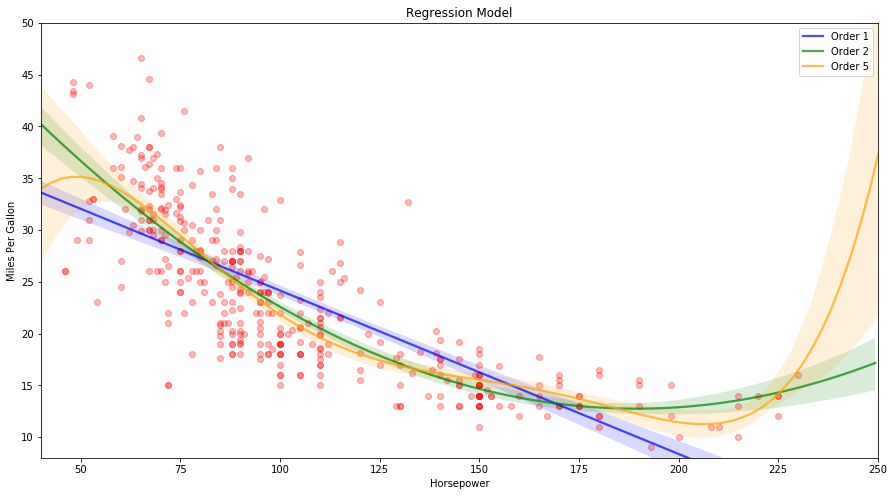

In [5]:
auto = pd.read_csv("data/Auto.csv")
auto.dropna(inplace=True)
auto = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype(int)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
sns.regplot(x="horsepower", y="mpg", color='r', fit_reg=True, data=auto, order=1, scatter_kws={'alpha':0.1}, 
            line_kws={'color':'blue', 'alpha':0.7, 'label':'Order 1'})
sns.regplot(x="horsepower", y="mpg", color='r', fit_reg=True, data=auto, order=2, scatter_kws={'alpha':0.1}, 
            line_kws={'color':'g', 'alpha':0.7, 'label':'Order 2'})
sns.regplot(x="horsepower", y="mpg", color='r', fit_reg=True, data=auto, order=5, scatter_kws={'alpha':0.1}, 
            line_kws={'color':'orange', 'alpha':0.7, 'label':'Order 5'})

ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles Per Gallon')
ax.set_title('Regression Model')
ax.set_ylim(8, 50)
ax.set_xlim(40, 250)
ax.legend()

plt.show()

#### 3.3.3 Potential Problems

The problems which arise when we fit a linear regression to a particular data set are as follows:

 - <b>Non-linearity of the Data:</b> 

    <b>Residual plots</b> are a useful graphical tool for identifying non-linearity. For simple linear regression, a plot of residual vd predictor can be analyzed. In the case of multiple linear regression, as there are multiple predictors, a plot of residuals vs predicted values can be analyzed. Ideally, the residual plot will show no discernible pattern. The presence of a pattern may indicate a problem with some aspect of the linear model. If the residual plots indicate that there is a non-linear associations in the data, non-linear transformation of the predictors can be used in the model.


 - <b>Correlation of Error Terms:</b>

    An important assumption of linear regression model is that the error terms are uncorrelated. If there is a correlation between the error terms, the estimated standard errors will tend to underestimate the true standard errors. As a result, the confidence and prediction intervals will be narrower and the p-value associated with the model will be lower which results in an <b>unwarranted sense of confidence in the model.</b>d
    
    Correlation in error terms might occur in the context of <b>time series</b> data. This can be visualized by plotting the residuals against time and checking for a discernable pattern.
    
    
 - <b>Non-constant Variance of Error Terms:</b>
 
     Another assumption of the linear regression model is that the error terms have a constant variance. The non-constant variances in the errors can be identified by the presence of a <b>funnel shape</b> in the residual plot. When faced with this problem one possible approach is to transform the response $Y$ using a concave function $logY$ or $\sqrt Y$.
     
     
 - <b>Outliers:</b>
 
     An outlier may have a little effect on the least square fit but it can cause other problems like high value of RSE and lower R$^2$ values which can affect the interpretation of the model. <b>Residual plots</b> can be used to identify outliers.
     
     
 - <b>High Leverage Points:</b>
 
     High leverage points have an unsual values for $x_i$. Removing high leverage point has more substantial impact on the least square line compared to the outliers. Hence it is important to identify high leverage points. In a simple linear regression, it is easy to check on the range of the predictors and find the high levarage points. For a multiple linear regression, the predictors may lie in their individual ranges but can lie outside in terms of the full set of predictors. <b>Leverage statistic</b> is a way to identify the high leverage points. A large value of this statistic indicates high leverage.
     
     
 - <b>Collinearity:</b>
 
     When two or more predictor variables are closely related to each other, a situation of collinearity arises. Due to collinearity, it can be impossible to separate out the individual effects of collinear variables on the response. Collinearity also reduces the estimation accuracy of the regression coefficients. As <b>t-statistic</b> of a predictor is calculated by dividing $\beta_i$ by its standard error, and hence collinearity results in the decline of t-statistic and consequently we may <b>fail to reject the null hypothesis.</b> 
     
     A simple approach is to detect collinearity is by analyzing the <b>correlation matrix</b>. This process has a drawback as it can not detect <b>multicollinearity</b> (collinearity between three or more variables). A better way to assess multicollinearity is by computing <b>variance inflation factor (VIF)</b>. VIF is the ratio of variance in a model with multiple predictors, divided by the variance of a model with one predictor alone. Smallest possible value of VIF is 1 and as a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity.
     
     There are two approaches to deal with the problem of collinearity. One is to simply drop one of the problematic variable. Alternatively we can combine the collinear variables together as a single predictor.

#### 3.5 Comparison of Linear Regression with K-Nearest Neighbors

Linear regression is an example of <b>parametric approach</b>, as it assumes a linear form for $f(X)$. It has the advantage of easy to fit as we only need to estimate a small number of coefficients. The one disadvantage of parametric method is that, they make a strong assumption about the shape of $f(X)$ and hence can affect the prediction accuracy if the shape deviates from the assumption.

<b>Non-parametric</b> methods does not assume a parametric form for $f(X)$ and hence provide a more flexible approach for regression. <b>KNN (K-nearest neighbors) regression</b> is an example of this.

KNN regression first identifies $K$ nearest training observations to $x_0$, represented as $N_0$. It then estimates $f(x_0)$ as the average of the training responses in $N_0$ as:

$$\widehat{f}(x_0) = \frac{1}{K} \sum_{x_i \in N_0} y_i$$

As the value of $K$ increases, the smothness of fit increases. The optimal vale of $K$ depends on the <b>bias-variance tradeoff</b>. A small value of $K$ provides the most flexible fit, which will have low bias but high variance. On contrast larger value of $K$ provides a smoother and less variable fit (as prediction depends on more points, changing one will have smaller effect on the overall prediction).

<b>The parametric approach will outperform the nonparametric approach if the parametric form that has been selected is close to the true form of $f$.</b> In this case, the non-parametric approach incurs a cost in variance that is not offset by a reduction in bias. As level of non-linearlity increases, for $p=1$, KNN regression outperforms linear regression. But as number of predictors increases, the performance of linear regression is better than KNN. This arises due to the phenomenon which can be termed as <b>curse of dimensionality</b>. As the number of predictors increase, number of dimensions increases and hence the given test observation $x_0$ may be very far away in the p-dimensional space when p is large and hence a poor KNN fit. <b>As a general rule, parametric methods will tend to outperform non-parametric approaches when there is a small number of observations per predictor.</b> Even when the dimension is small, linear regression is preferred due to better interpretability.

#### 3.7 Exercises
#### Conceptual

<img src="images/Q3.3.PNG"  width="1000px">

<b>Solution:</b> The linear fit can be given as:

$$50 + (20 \times GPA) + (0.07 \times IQ) + (35 \times GENDER) + (0.01 \times GPA \times IQ) - (10 \times GPA \times GENDER)$$

(a) For a fixed value of IQ and GPA, the average salary for male will be $50 + 20 \times GPA$ and for the female it will be $85 + 20 \times GPA - 10 \times GPA$. For the salary of male to be higher, $50 + 20GPA > 85 + 10GPA$, i.e. $GPA > 3.5$.

Hence, the true statement is: <b>For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.</b>

(b) The prediction is 137.1 and hence the salary will be $137100.

(c) <b>False</b>. We need to test the hypothesis for the coefficient to be equal to 0.

<b>Solution 4:</b> (a) As the true relationship between $X$ and $Y$ is linear, there is a chance that the RSS of training data for the linear model will be lower. But as the RSS highly depends on the distribution of points, there is a chance that the polynomial regression can overfit the points and hence can results in lower RSS.

(b) Test RSS for the linear model should be lower as the test data should follow the linear curve.

(c) The polynomial regression, being the more flexible one will follow the training data more closely and hence resulting in lower training RSS.

(d) For the test data, we can not conclude anything without observing the data.

<b>Solution 5:</b> $a_i^{'}$ can be calculated as:

$$a_i^{'} = \frac{x_i x_i^{'}}{\sum_{k=1}^{n}x_k^2}$$

<b>Solution 6:</b> The least square line can be denoted as:

$$y = \widehat{\beta_0} + \widehat{\beta_1}x$$

Substituting $\bar{x}$ and replacing the optimal value of $\beta_0$, we get:

$$y = \widehat{\beta_0} + \widehat{\beta_1}\bar{x} = (\bar{y} - \widehat{\beta_1}\bar{x}) + \widehat{\beta_1}\bar{x} = \bar{y}$$

<b>Solution 7:</b> Assumption: $\bar{x} = 0, \bar{y} = 0$. The correlation is given as:

$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}} = \frac{\sum_{i=1}^{n}(x_i)(y_i)}{\sqrt{\sum_{i=1}^{n} (x_i)^2} \sqrt{\sum_{i=1}^{n} (y_i)^2}}$$

R-statistic is given as (Replacing $\bar{y} = 0, \beta_0 = 0$):

$$R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^{n} (\widehat{y_i} - y_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
 = 1 - \frac{\sum_{i=1}^{n} (\widehat{y_i} - y_i)^2}{\sum_{i=1}^{n} (y_i)^2} =  1 - \frac{\sum_{i=1}^{n}(\beta_0 + \beta_1 x_i - y_i)^2}{\sum_{i=1}^{n} (y_i)^2} = 1 - \frac{\sum_{i=1}^{n} (\beta_1 x_i - y_i)^2}{\sum_{i=1}^{n} (y_i)^2}$$
 
$\beta_1$ is given as:

$$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} = 
\frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n}(x_i)^2}$$

Replacing $\beta_1$ in the above equation and solving we get,

$$R^2 = \frac{\sum_i (y_i)^2 - (\sum_i (y_i)^2 + \sum_i (\beta_1x_i)^2 - \sum_i{2\beta_1 x_i y_i})}{\sum_i (y_i)^2}
= \frac{\sum_i{2\beta_1 x_i y_i} - \sum_i (\beta_1x_i)^2}{\sum_i (y_i)^2} = r^2$$

#### Applied

<b>Solution 8:</b> 

(a) Perform linear regression on auto data with <b>mpg</b> as response and <b>horsepower</b> as the predictor and display the summary results.

In [6]:
import statsmodels.api as sm

X = sm.add_constant(auto[['horsepower']], prepend=True)
model = sm.OLS(auto['mpg'], X)
result = model.fit()
print(result.summary())
print("Prediction for horsepower 98: " +str(result.predict([1, 98])))
print("95% CI: " +str(result.conf_int(alpha=0.05, cols=None)))

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           7.03e-81
Time:                        21:37:43   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

i. Is there a relationship between the predictor and the response?

Yes

ii. How strong is the relationship between the predictor and the response?

As the value of $R^2$-statistic is 0.606, which means that 60% variability is explained by the model.

iii. Is the relationship between the predictor and the response positive or negative?

Negative coefficient denotes negative relationship.

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?

The value of mpg for horsepower = 98 is <b>24.4671</b>.

(b) Plot the response and the predictor. Also show the regression line.

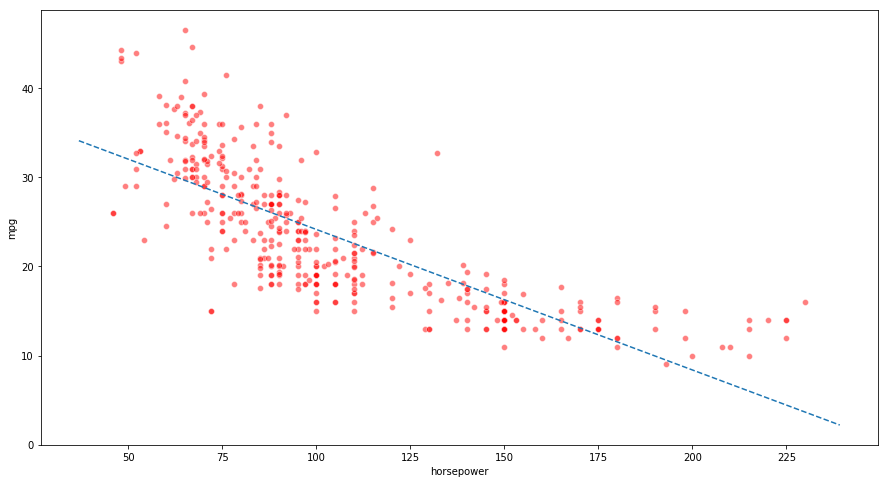

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

ax = sns.scatterplot(x="horsepower", y="mpg", color='r', alpha=0.5, data=auto)

x_vals = np.array(ax.get_xlim())
y_vals = 39.9359 - 0.1578 * x_vals
plt.plot(x_vals, y_vals, '--')

<b>Solution 9:</b>

(a) Produce a scatterplot matrix which includes all of the variables in the data set.

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


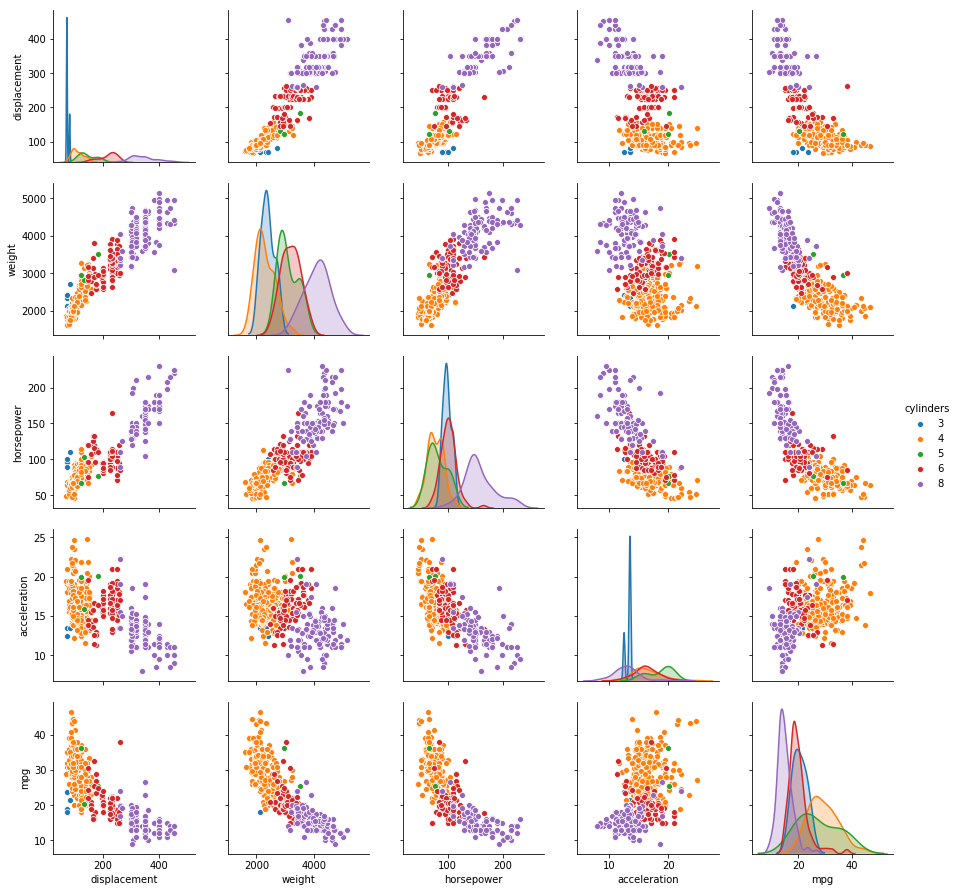

In [8]:
# Scatter plot of quantitative variables
sns.pairplot(auto, vars=['displacement', 'weight', 'horsepower', 'acceleration', 'mpg'], hue='cylinders')

(b) Compute the matrix of correlations between the variables.

In [9]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors.

In [10]:
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
X = sm.add_constant(X, prepend=True)
y = auto['mpg']

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 06 Sep 2018   Prob (F-statistic):          2.04e-139
Time:                        21:37:48   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

i. Is there a relationship between the predictors and the response?

As the $R^2$-statistic is 0.821, we can say that 82% variability is explained by the model.

ii. Which predictors appear to have a statistically significant relationship to the response?

The predictors that have statistically significant relationship to the response are: <b>displacement, weight, year</b> and <b>origin</b>.

iii. What does the coefficient for the year variable suggest?

The coefficient of year varaible suggests that if all the other predictors are kept constant, increase of 1 in year results in 0.7508 increase in mpg.

(e) Fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [11]:
auto['cylinders_displacement'] = auto['cylinders']*auto['displacement']
auto['horsepower_displacement'] = auto['horsepower']*auto['displacement']
auto['weight_displacement'] = auto['weight']*auto['displacement']

X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 
          'cylinders_displacement', 'horsepower_displacement', 'weight_displacement']]
X = sm.add_constant(X, prepend=True)
y = auto['mpg']

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     246.0
Date:                Thu, 06 Sep 2018   Prob (F-statistic):          1.96e-159
Time:                        21:37:48   Log-Likelihood:                -967.41
No. Observations:                 392   AIC:                             1957.
Df Residuals:                     381   BIC:                             2000.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Interactions of <b>horsepower and displacement</b> and <b>weight and displacement</b> have significant effect.

<b>Solution 10:</b> This question should be answered using the Carseats data set.

(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [12]:
carsets = pd.read_csv("data/Carsets.csv")
carsets['US'] = carsets['US'].map({'Yes': 1, 'No': 0})
carsets['Urban'] = carsets['Urban'].map({'Yes': 1, 'No': 0})

X = carsets[['Price', 'Urban', 'US']]
X = sm.add_constant(X, prepend=True)
y = carsets['Sales']

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           2.39e-23
Time:                        21:37:48   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

Sales decreases by 0.0545 per unit increase in Price given that all the other predictors are not changed. Urban has no significant effect on the response. If all the other predictors are constant, being a US car increases the Sales by average of 1.2006.

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

The model in equation form is as follows:

$$Sales = 13.0435 - 0.0545 \times Price + 1.2006 - 0.0219 \ (if \ US, Urban)$$
$$Sales = 13.0435 - 0.0545 \times Price + 1.2006 \ (if \ US, \ not \ Urban)$$
$$Sales = 13.0435 - 0.0545 \times Price - 0.0219 \ (if \ not \ US, Urban)$$
$$Sales = 13.0435 - 0.0545 \times Price \ (if \ not \ US, not \ Urban)$$

(d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?

We can reject the null hypothesis for <b>Price</b> and <b>US</b>.

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [13]:
X = carsets[['Price', 'US']]
X = sm.add_constant(X, prepend=True)
y = carsets['Sales']

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           2.66e-24
Time:                        21:37:48   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

(f) How well do the models in (a) and (e) fit the data?

If we see the $R^2$-statistic of the models, for both the models, it has a value of <b>0.239</b>. Hence both the models explains 23.9% variability in data and model in (a), which has one more predictor does not improve over accuracy.

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

The 95% confidence intervals for the coefficients are:
 - Intercept : [11.7688, 14.2928]
 - Price : [-0.0555, 0.0535]
 - US : [0.6836, 1.7156]

<b>Solution 11.</b> In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as:

In [14]:
import random

random.seed(1)
x = np.random.normal(loc=0, scale=1, size=100)
y = 2*x + np.random.normal(loc=0, scale=1, size=100)

(a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate $\widehat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results.

In [15]:
model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     322.1
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           6.90e-33
Time:                        21:37:48   Log-Likelihood:                -136.69
No. Observations:                 100   AIC:                             275.4
Df Residuals:                      99   BIC:                             278.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8076      0.101     17.946      0.0

Coefficient estimate is 1.9766 with a standard error of 0.099. The t-statistic associated with null hypothesis is 19.900 which gives a significantly low p-value. The $R^2$-statistic, whose value is 0.800, suggests that the predictor is significant and explains 80% of the variability.

(b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

In [16]:
model = sm.OLS(x, y)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     322.1
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           6.90e-33
Time:                        21:37:48   Log-Likelihood:                -64.089
No. Observations:                 100   AIC:                             130.2
Df Residuals:                      99   BIC:                             132.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4232      0.024     17.946      0.0

Coefficient estimate is 0.4048 with a standard error of 0.020. The t-statistic associated with null hypothesis is 19.900 which gives a significantly low p-value. The $R^2$-statistic, whose value is 0.800, suggests that the predictor is significant and explains 80% of the variability.

(c) What is the relationship between the results obtained in (a) and (b)?

The coefficients for the two models follow inverse relationship. The t-statistic and $R^2$-statistic are same.

<b>Solution 12:</b> This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate $\widehat{\beta}$ for the linear regression of Y onto X without an intercept is given by:

$$\widehat{\beta} = \frac{\sum_{i=1}^{n}x_i y_i}{\sum_{i^{'}=1}^{n}x_{i^{'}}^2}$$

Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

The coefficients will be same when:

$$\sum_{i=1}^{n}x_{i}^2 = \sum_{i=1}^{n}y_{i}^2$$

(c) Generate an example with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

In [17]:
random.seed(1)
x = np.random.normal(loc=0, scale=1, size=100)
y = np.random.normal(loc=0, scale=1, size=100)
print(np.sum(x**2))
print(np.sum(y**2))

model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

print("\n \n")

model = sm.OLS(x, y)
result = model.fit()
print(result.summary())

83.09270311310463
121.64942659232169
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.004235
Date:                Thu, 06 Sep 2018   Prob (F-statistic):              0.948
Time:                        21:37:48   Log-Likelihood:                -151.69
No. Observations:                 100   AIC:                             305.4
Df Residuals:                      99   BIC:                             308.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -

<b>Solution 13:</b> In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.

In [18]:
random.seed(1)

(a) Create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

In [19]:
X = np.random.normal(loc=0, scale=1, size=100)

(b) Create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

In [20]:
eps = np.random.normal(loc=0, scale=0.25, size=100)

(c) Using X and eps, generate a vector y according to the model $Y = −1 + 0.5X + \epsilon$. What is the length of the vector Y? What are the values of β0 and β1 in this linear model?

In [21]:
Y = -1 + (0.5*X) + eps
print("Length of Y:" +str(len(Y)))

Length of Y:100


Lengt of Y is 100. The values of $\beta_0$ and $\beta_1$ are <b>-1</b> and <b>0.5</b> respectively.

(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

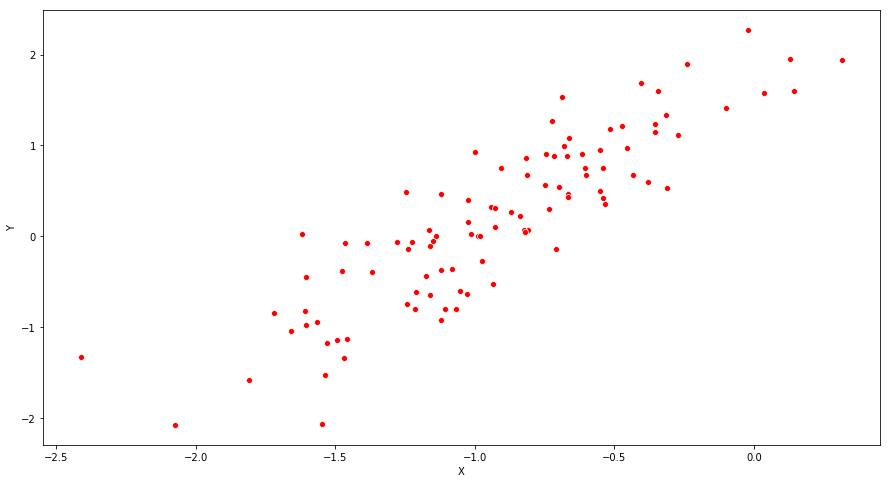

In [22]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax = sns.scatterplot(Y, X, color='r')

ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

(e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do $\widehat{\beta_0}$ and $\widehat{\beta_1}$ compare to β0 and β1?

The values of $\widehat\beta_0$ and $\widehat\beta_1$ are <b>-1.0145</b> and <b>0.5130</b> respectively. They are quite similar to $\beta_0$ and $\beta_1$.

In [23]:
X_1 = sm.add_constant(X, prepend=True)
model = sm.OLS(Y, X_1)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     332.6
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           2.89e-33
Time:                        21:37:49   Log-Likelihood:                 3.2646
No. Observations:                 100   AIC:                            -2.529
Df Residuals:                      98   BIC:                             2.681
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0103      0.024    -41.824      0.0

(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate legend.

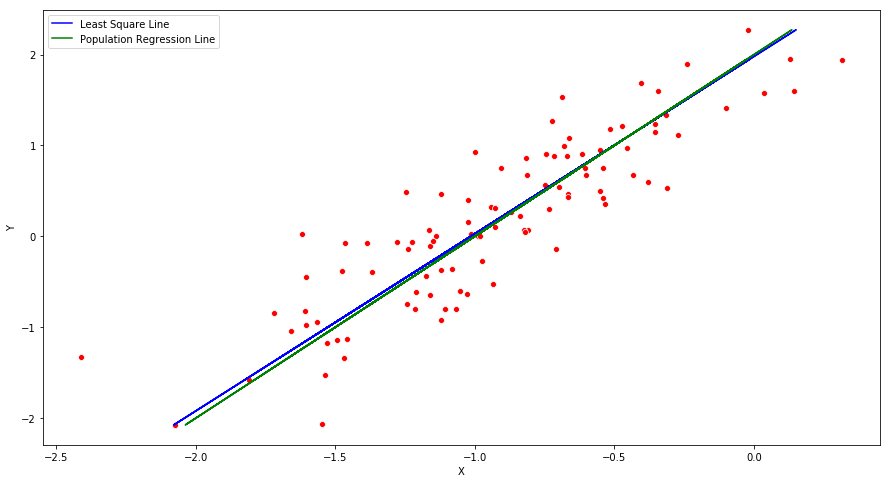

In [24]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax = sns.scatterplot(Y, X, color='r')

y_hat = -1.0145 + (0.5130 * X)
plt.plot(y_hat, X, color='blue', label="Least Square Line")

y_population = -1 + (0.5 * X)
plt.plot(y_population, X, color='green', label="Population Regression Line")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()

plt.show()

(g) Now fit a polynomial regression model that predicts y using x and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

As the p-value for the predictor $x^2$ is 0.644, it is not significant. The $R^2$-statistic has not improved much as well.

In [25]:
X_2 = X**2
X_pol = np.stack((X, X_2), axis=-1)

X_pol = sm.add_constant(X_pol, prepend=True)
model = sm.OLS(Y, X_pol)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     167.1
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           3.73e-32
Time:                        21:37:49   Log-Likelihood:                 3.8606
No. Observations:                 100   AIC:                            -1.721
Df Residuals:                      97   BIC:                             6.094
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0301      0.030    -33.950      0.0

<b>Solution 14:</b> This problem focuses on the collinearity problem.

(a) Generate data by following R command:
 - set .seed (1)
 - x1=runif (100)
 - x2 =0.5* x1+rnorm (100) /10
 - y=2+2* x1 +0.3* x2+rnorm (100)
 
The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

The linear model is:

$$ Y = 2 + 2 \times X1 + 0.3 \times X2 + \epsilon$$

The regression coefficients are 2,2 and 0.3.

In [26]:
random.seed(1)
X1 = np.random.normal(loc=0, scale=1, size=100)
X2 = 0.5*X1 + (np.random.normal(loc=0, scale=1, size=100)/10)
Y = 2 + (2*X1) + (0.3*X2) + (np.random.normal(loc=0, scale=1, size=100))

(b) What is the correlation between X1 and X2? Create a scatterplot displaying the relationship between the variables.

The correlation coefficient between X1 and X2 is <b>0.9836387796085876</b>. The scatterplot shows the same tendency.

Correlation coefficient: 0.9773524295882932


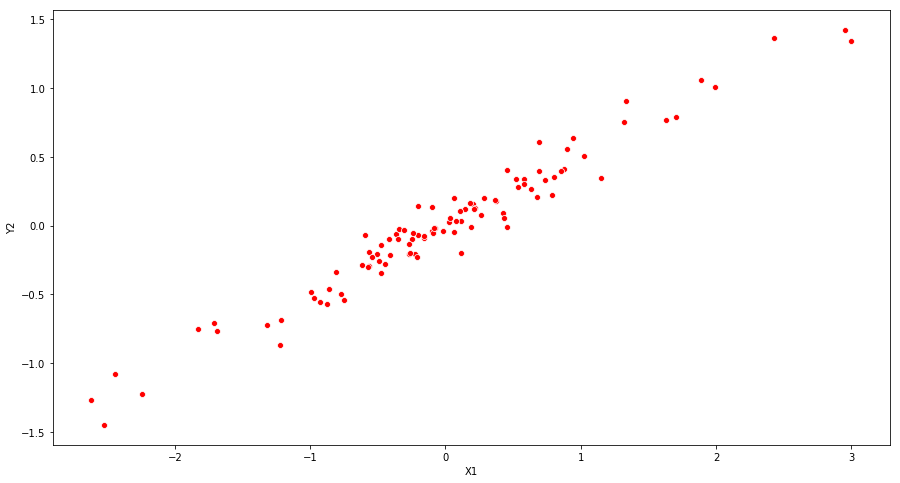

In [27]:
print("Correlation coefficient: " + str(np.corrcoef(X1, X2)[0][1]))
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x=X1, y=X2, color='r')

ax.set_xlabel("X1")
ax.set_ylabel("Y2")

plt.show()

(c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are $\widehat{\beta_0}, \widehat{\beta_1}, \widehat{\beta_2}$? How do these relate to the true β0, β1, and β2? Can you
reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

The values of $\widehat{\beta_0}, \widehat{\beta_1}, \widehat{\beta_2}$ are 1.8824, 1.1253 and  2.0781. We can reject the null hypothesis for $\widehat{\beta_0}$ and $\widehat{\beta_1}$ as p-values are less than 0.05. If we increase the level of confidence to 0.01, the null hypothesis for $\widehat{\beta_1}$ can not be rejected.

In [28]:
X = np.stack((X1, X2), axis=-1)
X = sm.add_constant(X, prepend=True)

model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     255.6
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           2.15e-39
Time:                        21:37:49   Log-Likelihood:                -137.49
No. Observations:                 100   AIC:                             281.0
Df Residuals:                      97   BIC:                             288.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0716      0.097     21.300      0.0

(d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

The values of $\widehat{\beta_0}$ and $\widehat{\beta_1}$ are 1.8988 and 2.1601. We can reject the null hypothesis for $\widehat{\beta_1}$ as p-value is very low.

In [29]:
X = sm.add_constant(X1, prepend=True)

model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     512.0
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           1.07e-40
Time:                        21:37:49   Log-Likelihood:                -137.85
No. Observations:                 100   AIC:                             279.7
Df Residuals:                      98   BIC:                             284.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0752      0.097     21.390      0.0

(e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

The values of $\widehat{\beta_0}$ and $\widehat{\beta_1}$ are 1.8606 and 4.2647. We can reject the null hypothesis for $\widehat{\beta_1}$ as p-value is very low.

In [30]:
X = sm.add_constant(X2, prepend=True)

model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     431.1
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           1.16e-37
Time:                        21:37:49   Log-Likelihood:                -144.97
No. Observations:                 100   AIC:                             293.9
Df Residuals:                      98   BIC:                             299.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0543      0.104     19.721      0.0

(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

In case of collinearity, t-statistic declines and consequently we may fail to reject the null hypothesis. This is the case for $\widehat{\beta_2}$ in (c). For the model in (c), the standard errors corresponding to $\beta$s are high and hence the t-statistic does not capture the accurate behaviour.

<b>Solution 15:</b> This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [31]:
from sklearn.datasets import load_boston

boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
                                               'PTRATIO', 'B', 'LSTAT'])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

The p-values for $\beta_1$s suggest that for the model with predictor <b>CHAS</b>, we can not reject the null hypothesis and hence the model is not significant. The plots shown in the below figure suggest the same.

In [32]:
y = df_boston['CRIM']

X = df_boston[['ZN']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print("\n\n")

X = df_boston[['INDUS']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print("\n\n")

X = df_boston[['CHAS']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print("\n\n")

X = df_boston[['NOX']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print("\n\n")

X = df_boston[['RM']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print("\n\n")

X = df_boston[['AGE']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print("\n\n")

X = df_boston[['DIS']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print("\n\n")

X = df_boston[['RAD']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print("\n\n")

X = df_boston[['TAX']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print("\n\n")

X = df_boston[['PTRATIO']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print("\n\n")

X = df_boston[['B']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print("\n\n")

X = df_boston[['LSTAT']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print("\n\n")

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     20.88
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           6.15e-06
Time:                        21:37:49   Log-Likelihood:                -1795.8
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4292      0.417     10.620      0.0

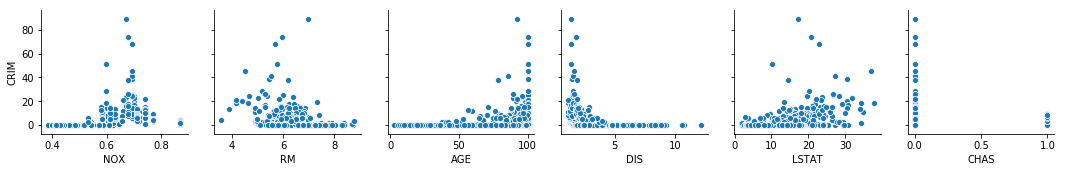

In [33]:
sns.pairplot(df_boston, y_vars=['CRIM'], x_vars=['NOX', 'RM', 'AGE', 'DIS', 'LSTAT', 'CHAS'])

(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

For the predictors: <b>DIS, RAD, BLACK, LSTAT</b>, we can reject the null hypothesis.

In [34]:
Y = df_boston['CRIM']
X = df_boston[['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     31.77
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           6.16e-54
Time:                        21:37:50   Log-Likelihood:                -1661.2
No. Observations:                 506   AIC:                             3348.
Df Residuals:                     493   BIC:                             3403.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3701      7.012      1.479      0.1